In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [134]:
df = pd.read_csv('tambov.csv', sep=';', comment='#', index_col=False, low_memory=False)
df.rename(columns={f'{df.columns[0]}' : 'Time'}, inplace=True)
df.head()

,Time,T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
0,31.12.2022 21:00,1.1,752.6,764.7,1.3,96.0,"Ветер, дующий с западо-северо-запада",6.0,NaN,NaN,...,NaN,NaN,10.0,0.5,NaN,NaN,NaN,NaN,NaN,NaN
1,31.12.2022 18:00,1.4,751.3,763.3,1.8,89.0,"Ветер, дующий с запада",6.0,NaN,NaN,...,NaN,NaN,10.0,-0.2,3.0,12.0,NaN,NaN,NaN,NaN
2,31.12.2022 15:00,1.4,749.5,761.5,-0.2,94.0,"Ветер, дующий с западо-юго-запада",5.0,NaN,NaN,...,Высокослоистые непросвечивающие или слоисто-до...,NaN,10.0,0.5,NaN,NaN,NaN,NaN,NaN,NaN
3,31.12.2022 12:00,1.7,749.7,761.6,0.2,93.0,"Ветер, дующий с западо-юго-запада",4.0,NaN,NaN,...,NaN,NaN,10.0,0.6,NaN,NaN,NaN,NaN,NaN,NaN
4,31.12.2022 09:00,1.2,749.5,761.5,-0.3,96.0,"Ветер, дующий с юго-запада",5.0,NaN,NaN,...,Высокослоистые непросвечивающие или слоисто-до...,NaN,7.0,0.6,NaN,NaN,NaN,NaN,NaN,NaN


In [135]:
df['Time'] = np.array([dt.datetime.strptime(i, '%d.%m.%Y %H:%M') for i in df['Time']])

In [154]:
df['DD'].unique()

array(['Ветер, дующий с западо-северо-запада', 'Ветер, дующий с запада',
       'Ветер, дующий с западо-юго-запада', 'Ветер, дующий с юго-запада',
       'Ветер, дующий с юга', 'Ветер, дующий с юго-юго-запада',
       'Ветер, дующий с юго-востока',
       'Ветер, дующий с востоко-юго-востока', 'Ветер, дующий с востока',
       'Ветер, дующий с востоко-северо-востока',
       'Ветер, дующий с северо-северо-востока',
       'Ветер, дующий с северо-востока',
       'Ветер, дующий с северо-северо-запада', 'Ветер, дующий с севера',
       'Ветер, дующий с юго-юго-востока', 'Штиль, безветрие',
       'Ветер, дующий с северо-запада', 'Переменное направление', nan],
      dtype=object)

Text(0.5, 1.0, 'Ветер, дующий с запада')

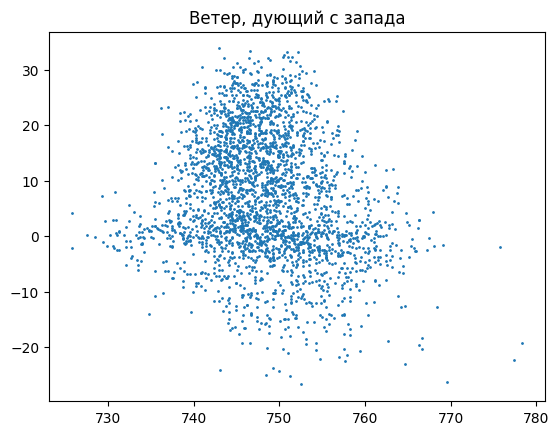

In [157]:
sub = df.loc[:,['T', 'Po']][df['DD'] == df['DD'].unique()[1]].dropna()
plt.scatter(sub['Po'], sub['T'], s=1)
plt.title(df['DD'].unique()[1])